In [29]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict , Literal
import math

In [30]:
class QuadState(TypedDict):

    a: int
    b: int
    c: int
    equation: str
    discriminant: float
    result: str

In [51]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x² + {state['b']}x + {state['c']} = 0"
    return {'equation':equation}


In [46]:
def calculate_discriminant(state: QuadState):
    discriminant = (state['b']**2)-(4*state['a']*state['c'])
    return {'discriminant':discriminant}

In [47]:

def real_roots(state: QuadState):
        root1 = (-state['b'] + math.sqrt(state['discriminant'])) / (2*state['a'])
        root2 = (-state['b'] - math.sqrt(state['discriminant'])) / (2*state['a'])
        
        return {'result':f'Two real roots:{root1},{root2}'}

In [48]:
def no_real_roots(state: QuadState):
        real = -state['b'] / (2*state['a'])
        imag = math.sqrt(-state['dicriminant']) / (2*state['a'])
        root1 = f"{real} + {imag}i"
        root2 = f"{real} - {imag}i"
        return {'result': f'Two complex roots: {root1}, {root2}'}

In [49]:
def repeated_roots(state: QuadState):
    if state['dicriminant'] == 0:
        root = -state['b'] / (2 * state['a'])
        return {'result': f'One real root: {root}'}

In [50]:
def check_condition(state: QuadState) -> Literal['real_roots','repeated_roots','no_real_roots']:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] < 0:
        return "no_real_roots"
    else:
        return "repeated_roots"

In [54]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('repeated_roots',repeated_roots)



graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow = graph.compile()


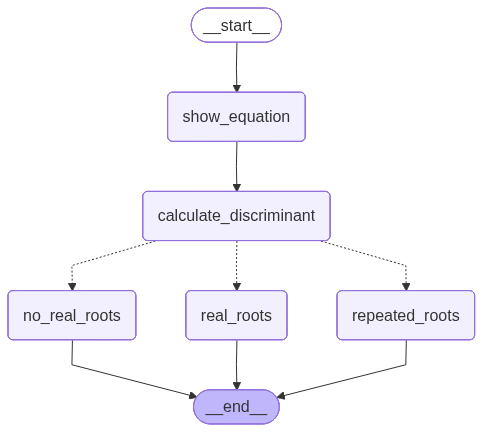

In [55]:
workflow

In [57]:
initial_state = {
    'a':4,
    'b':-5,
    'c':-4
}
result = workflow.invoke(initial_state)

In [62]:
print(result['equation'])
print(result['result'])


4x² + -5x + -4 = 0
Two real roots:1.8042476415070754,-0.5542476415070754
